<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

#### This notebook summarizes the workflow of data visualization in Python. It is made by and summarized by yuka_with_data. The content is a summary of IBM's Python Data Science Course.

## Required Libraries

In [68]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


## Load Data

In [69]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

## Clean Up the Data

In [70]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\yukam\AppData\Local\Temp\ipykernel_30200\2754968886.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


## Waffle Chart

Waffle Chart is a unique visualization tool to display progress toward

In [71]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

Create Waffle Chart Function:

In [72]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [73]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Cloud

### Load Library

In [75]:
from wordcloud import wordcloud, STOPWORDS

### Load Data

In [76]:
import urllib
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Save a set of `STOPWORDS` into a variable.

In [77]:
stopwords = set(STOPWORDS)

In [78]:
# A set of STOPWORDS
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Create Word Cloud object. 

In [79]:
from wordcloud import WordCloud

# Word Cloud object
alice_word = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
alice_word.generate(alice_novel)

Use word cloud object to visualize it.

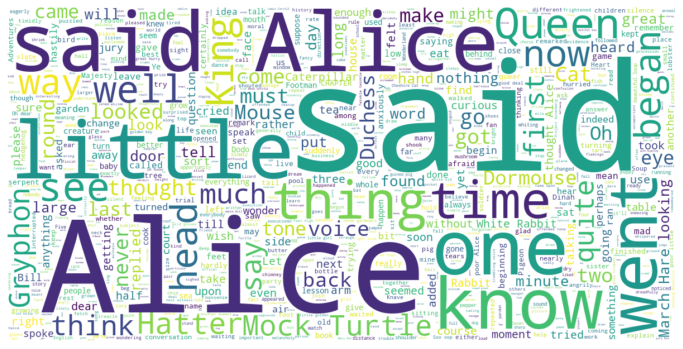

In [80]:
fig = plt.figure(figsize=(12,8))
# display the word cloud
plt.imshow(alice_word, interpolation='bilinear')
plt.axis('off')
plt.show()

Add uninformative words to `STOPWORDS` set.

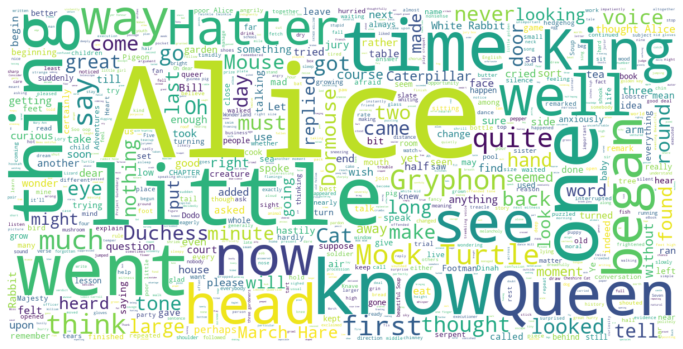

In [81]:
# add 'said' to STOPWORDS
stopwords.add('said')

alice_word.generate(alice_novel)

fig = plt.figure(figsize=(12,8))

plt.imshow(alice_word, interpolation='bilinear')
plt.axis('off')
plt.show()

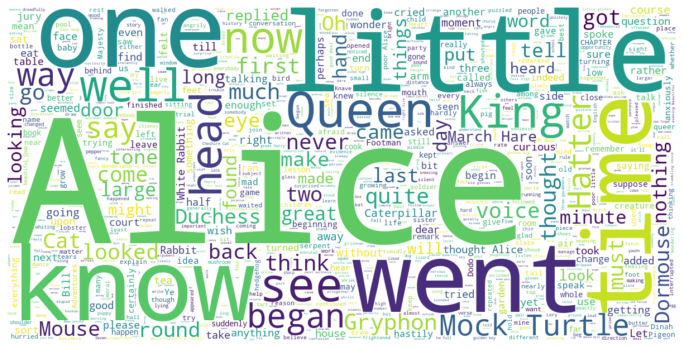

In [82]:
stopwords.add('thing')

alice_word.generate(alice_novel)

fig = plt.figure(figsize=(12,8))

plt.imshow(alice_word, interpolation='bilinear')
plt.axis('off')
plt.show()

### Mask Effect

Word Cloud package includes the feature to mask word clouds onto any shape. 

First load the mask image.

In [83]:
# mask image
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

Generate Mask Image.

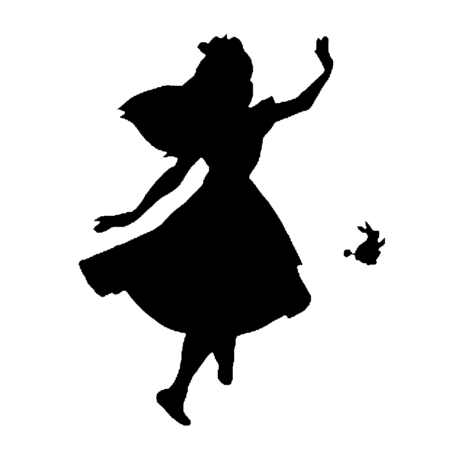

In [84]:
fig = plt.figure(figsize=(12,8))

plt.imshow(alice_mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

This time, Generate word cloud object with mask.

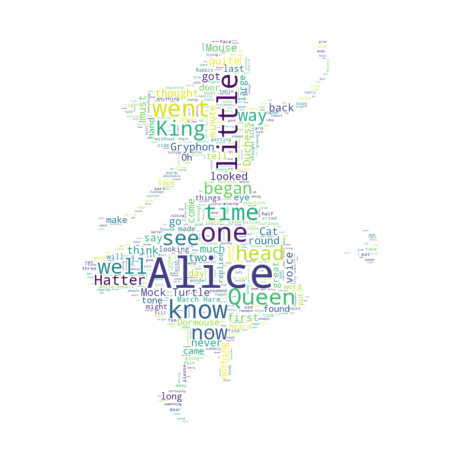

In [85]:
# Word Cloud Object With Mask
alice_word = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask # mask parameter
)

# Generate
alice_word.generate(alice_novel)

# display
fig = plt.figure(figsize=(12,8))

plt.imshow(alice_word, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plot Using Seaborn Library

In [86]:
import seaborn as sns 

In [87]:
# total population per year
df_total = pd.DataFrame(df_can[years].sum(axis=0))
# change index float
df_total.index = map(float,df_total.index)

df_total.reset_index(inplace=True)

df_total.columns=['year','total']

df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


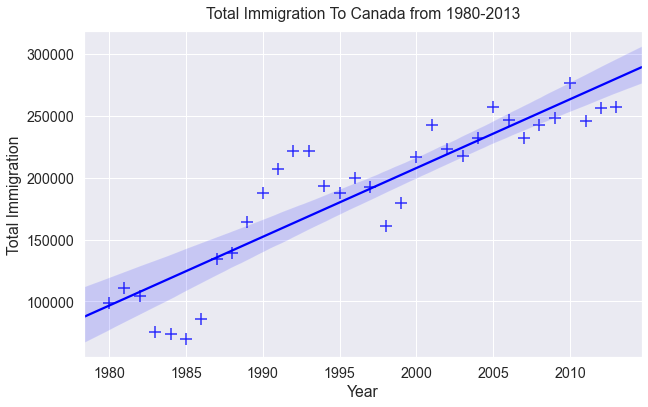

In [88]:
from matplotlib.pyplot import ylabel

plt.figure(figsize=(10,6))

sns.set(font_scale=1.3)

ax = sns.regplot(x='year',
            y='total',
            color='blue',
            marker='+',
            scatter_kws={'s':150},
            data=df_total)

ax.set_title("Total Immigration To Canada from 1980-2013", y=1.02)
ax.set(xlabel='Year',ylabel='Total Immigration')

plt.show()

Denmark, Norway, Sweden

In [89]:
df_den = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_total = pd.DataFrame(df_den.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year','total']
df_total['year']=df_total['year'].astype(int)

In [90]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Total Immigration')]

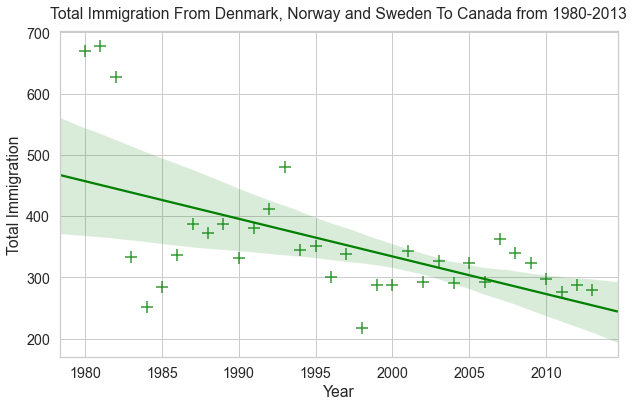

In [91]:
plt.figure(figsize=(10,6))

sns.set(font_scale=1.3)
sns.set_style('whitegrid')

ax = sns.regplot(x='year',
            y='total',
            color='green',
            marker='+',
            scatter_kws={'s':150},
            data=df_total)

ax.set_title("Total Immigration From Denmark, Norway and Sweden To Canada from 1980-2013", y=1.02)
ax.set(xlabel='Year',ylabel='Total Immigration')

# Folium Library

Folium is a Python library that helps you create several types of interactive maps. \
Folim-generated maps are usuful for dashboard building.

## Map

In [92]:
import folium

Use Map function for the base of World Map.

In [93]:
world_map = folium.Map()
world_map

Add location parameter with Latitude and Longtitude, set the low zoom level. The higher the zoom level the more the map is zoomed into the center.

In [94]:
# Latitude = 0, Longtitude = 0
world_map_2 = folium.Map(location=[0,0],zoom_start=2)
world_map_2

In [95]:
# Latitude = 56, Longtitude = 100, zoom start = 5
world_map_3 = folium.Map(location=[56,100],zoom_start=5)
world_map_3

### Stamen Toner

Stamen Toner is a high-contrast black and white maps. It is perfect for data mashups and exploring river, lakes, and coastal lines. 

In [96]:
# Stamen Toner
s_map = folium.Map(location=[58.027164,-105.38086],zoom_start=3, tiles='Stamen Toner')
s_map

### Terrain Map

Stamen Terrain emphasizes hill shading and natural vegetation using various colors. 

In [97]:
t_map = folium.Map(location=[36.281647,139.07727],zoom_start=3,tiles='Stamen Terrain')
t_map

## Add Markers

Generate a map centered around Tokyo Sky Tree, and add a circle marker around it.

In [98]:
from importlib.machinery import FrozenImporter

s_map = folium.Map(location=[35.7101,139.8107], # Sky Tree Centered
                    width="%100",
                    height="%100",
                    zoom_start=11, 
                    tiles='Stamen Toner')

folium.Circle(
    radius = 10000,
    location=[35.7101,139.8107],
    fill_color='red'
).add_to(s_map)

s_map

In [99]:
# Generate a base map
m_map = folium.Map(location=[35.7101,139.8107])
# Add marker tag ('Tokyo Sky Tree')
folium.Marker(location=[35.7101,139.8107],
              popup='Tokyo Sky Tree').add_to(m_map)
# Add Circle Marker
folium.CircleMarker(location=[35.7101,139.8107],
                    radius=100,
                    fill_color='blue').add_to(m_map)
# Genrate a map
m_map

In [100]:
from folium import plugins

m_map = folium.Map(location=[35.7101,139.8107],
                     zoom_start = 10)
# create MiniMap object
minimap = plugins.MiniMap()
# add minimap to the main map
m_map.add_child(minimap)
# generate map
m_map

### Add Data Markers

Load a data for Markers.

In [101]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [102]:
df_incidents.shape

(100, 13)

In [103]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Load the map with folium function, and bring in the data markers.

San Francisco \
37.77986° N, -122.42905° E

In [104]:
latitude = 37.78
longtitude = -122.43

In [105]:
sf_map = folium.Map(location=[latitude,longtitude],zoom_start = 12)
sf_map

In [106]:
# create a feature group for the incident df
incidents = folium.FeatureGroup()
# loop through the 100 incidents in the df & add incidents to the feature group
for lat, lng, in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5
        )
    )
# add incident markers to the main map
sf_map.add_child(incidents)

Superimpose the locations of the incidents onto the map by creating a feature group in Folium with its own features and style, and then add it to the main map. \
Add some pop-up text to display when hover over a marker. 

In [107]:
# create a feature group for the incident df
incidents = folium.FeatureGroup()
# loop through the 100 incidents in the df & add incients to the feature group
for lat, lng, in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5
        )
    )
# set up pop-up text
latitudes = list(df_incidents.Y)
longtitudes = list(df_incidents.X)
labels = list(df_incidents.Category)
# for loop to add text to each data point
for lat, lng, label in zip(latitudes, longtitudes, labels):
    folium.Marker([lat,lng],popup=label).add_to(sf_map)

# add incidents to the main sf map
sf_map.add_child(incidents)
    

In [108]:
sf_map = folium.Map(location=[latitude, longtitude], zoom_start=10)

for lat, lng, lab in zip(df_incidents.Y,df_incidents.X,df_incidents.Category):
    folium.features.CircleMarker(
        [lat,lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        popup=lab
    ).add_to(sf_map)

sf_map

In [109]:
# Cluster 
from folium import plugins

# base map
sf_map = folium.Map(location=[latitude,longtitude],zoom_start=12)

# create a cluster marker object
incidents = plugins.MarkerCluster().add_to(sf_map)
for lat,lng,lab, in zip(df_incidents.Y,df_incidents.X,df_incidents.Category):
    folium.Marker(
        location=[lat,lng],
        popup=lab,
        icon=None,
    ).add_to(incidents)

sf_map

## End